# Library and data upload

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [184]:
# Reading the classified dataset into a pandas dataframe
data = pd.read_csv("dataset.csv")
data.columns = ["id", "temperature", "humidity_relative", "light", "CO2", "humidity_absolute", "occupied"]

new_data = pd.read_csv("dataset_naoclassificado.csv")
new_data.columns = ["id", "temperature", "humidity_relative", "light", "CO2", "humidity_absolute"]

In [185]:
data.shape

(14000, 7)

# Data cleansing

In [186]:
print(data.info(verbose=True)) # There are some Null-Values
print("\n\n")
print(new_data.info(verbose=True)) # There are no Null-Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14000 non-null  int64  
 1   temperature        13998 non-null  float64
 2   humidity_relative  13999 non-null  float64
 3   light              13995 non-null  float64
 4   CO2                13999 non-null  float64
 5   humidity_absolute  13999 non-null  float64
 6   occupied           13999 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 765.8 KB
None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5560 entries, 0 to 5559
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5560 non-null   int64  
 1   temperature        5560 non-null   float64
 2   humidity_relative  5560 non-null   float64
 3   light              5560 non-null   float64
 4   C

In [187]:
# Exact amount of nulls by columns

data.isnull().sum() 

id                   0
temperature          2
humidity_relative    1
light                5
CO2                  1
humidity_absolute    1
occupied             1
dtype: int64

In [188]:
# Dropping the rows with NaNs and duplicate values (if there is any)

data = data.dropna().drop_duplicates().reset_index(drop = True)
data.isnull().sum()

id                   0
temperature          0
humidity_relative    0
light                0
CO2                  0
humidity_absolute    0
occupied             0
dtype: int64

In [189]:
data.shape

(13993, 7)

In [190]:
data.describe()

,id,temperature,humidity_relative,light,CO2,humidity_absolute,occupied
count,13993.000000,13993.000000,13993.000000,13993.000000,13993.000000,13993.000000,13993.000000
mean,7000.007432,20.906860,27.647950,164.726855,691.520515,0.004230,0.231330
std,4041.570897,1.163183,5.035528,312.048458,312.844367,0.000792,0.421698
min,1.000000,18.290688,15.697419,0.000000,381.009316,0.002354,0.000000
25%,3500.000000,20.081581,24.286458,0.000000,468.310676,0.003678,0.000000
50%,7000.000000,20.771422,27.434572,87.726472,563.427773,0.004264,0.000000
75%,10499.000000,21.582306,31.407818,249.273969,806.884272,0.004814,0.000000
max,14000.000000,25.126679,40.788658,26264.734900,2064.476737,0.006812,1.000000


# Data Analyzing


In [191]:
# Calculating correlation matrix using .corr() method

correlation_matrix = data.corr().round(2) 
correlation_matrix

,id,temperature,humidity_relative,light,CO2,humidity_absolute,occupied
id,1.00,-0.00,-0.01,-0.01,-0.00,-0.01,0.00
temperature,-0.00,1.00,-0.13,0.28,0.40,0.19,0.51
humidity_relative,-0.01,-0.13,1.00,-0.01,0.30,0.89,0.06
light,-0.01,0.28,-0.01,1.00,0.19,0.09,0.40
CO2,-0.00,0.40,0.30,0.19,1.00,0.46,0.50
humidity_absolute,-0.01,0.19,0.89,0.09,0.46,1.00,0.26
occupied,0.00,0.51,0.06,0.40,0.50,0.26,1.00


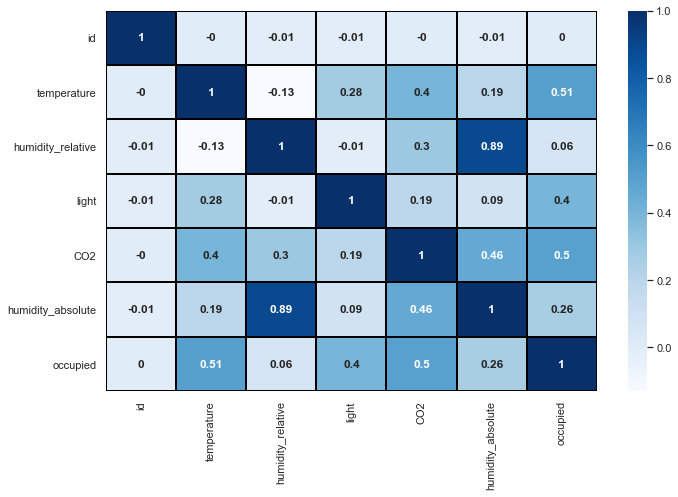

In [192]:
sns.heatmap(data=correlation_matrix , annot = True , cmap="Blues", annot_kws={'fontweight': 'bold'},
            linewidth =1,linecolor = 'black')
sns.set(rc = {'figure.figsize':(11,7)})

In [193]:
data.occupied.value_counts()

0.0    10756
1.0     3237
Name: occupied, dtype: int64

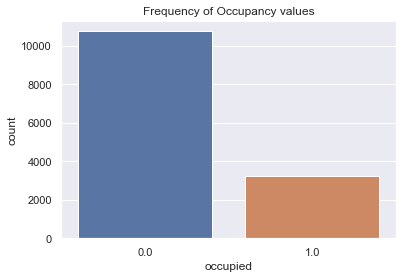

In [194]:
# Count plot on single categorical value

plt.figure(figsize=(6,4))
graph = sns.countplot(x="occupied",data = data)
plt.title("Frequency of Occupancy values")
plt.show()

# Train & Test

In [195]:
# Our features
X = data[["temperature", "humidity_relative","light","CO2","humidity_absolute"]]

# Our target
Y = data["occupied"]

# Most correlated features
X_corr = data[["temperature", "light","CO2"]]

# Our test data
X_new_data = new_data[["temperature", "humidity_relative","light","CO2","humidity_absolute"]]

In [196]:
#Import train_test_split function to split data into training ans testing sets

from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.3, random_state=1, stratify= Y)

In [197]:
# Subsets with most correlated features

X_train_corr, X_valid_corr, Y_train_corr, Y_valid_corr = train_test_split(X_corr, Y, test_size=0.3, random_state=1, stratify= Y)

In [198]:
print("X_train shape :", X_train.shape)
print("X_valid shape :", X_valid.shape)
print("Y_train shape :", Y_train.shape)
print("Y_valid shape :", Y_valid.shape)

print("\n\n")

print("X_train_corr shape :", X_train_corr.shape)
print("X_valid_corr shape :", X_valid_corr.shape)
print("Y_train_corr shape :", Y_train_corr.shape)
print("Y_valid_corr shape :", Y_valid_corr.shape)

X_train shape : (9795, 5)
X_valid shape : (4198, 5)
Y_train shape : (9795,)
Y_valid shape : (4198,)



X_train_corr shape : (9795, 3)
X_valid_corr shape : (4198, 3)
Y_train_corr shape : (9795,)
Y_valid_corr shape : (4198,)


## The Logistic Regression model

In [199]:
#Import Logistic Regression model

from sklearn.linear_model import LogisticRegression

In [200]:
# Instance of Logistic Regression model

logmodel_common = LogisticRegression()
logmodel_corr = LogisticRegression()

In [201]:
# Train the model

logmodel_common.fit(X_train, Y_train)
logmodel_corr.fit(X_train_corr, Y_train_corr)

LogisticRegression()

In [202]:
#Predicting validation values

predictions_common = logmodel_common.predict(X_valid)
predictions_corr = logmodel_corr.predict(X_valid_corr)

In [203]:
# Different metrics for testing model performance

# Classification Report

from sklearn.metrics import classification_report

print("\n ----- Classification Report ----- \n")
classification_report(Y_valid, predictions_common)


 ----- Classification Report ----- 



'              precision    recall  f1-score   support\n\n         0.0       0.91      0.95      0.93      3227\n         1.0       0.81      0.71      0.75       971\n\n    accuracy                           0.89      4198\n   macro avg       0.86      0.83      0.84      4198\nweighted avg       0.89      0.89      0.89      4198\n'

In [204]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

print("\n ----- CONFUSION MATRIX ----- \n")
confusion_matrix(Y_valid, predictions_common)


 ----- CONFUSION MATRIX ----- 



array([[3063,  164],
       [ 285,  686]], dtype=int64)

In [205]:
# Accuracy Score

from sklearn.metrics import accuracy_score

print("\n ----- ACCURACY SCORE ----- \n")
print("Accuracy Test with all features: {} %".format(round(accuracy_score(Y_valid, predictions_common)*100, 2)))
print("\n")
print("Accuracy Test with most correlated features: {} %".format(round(accuracy_score(Y_valid_corr, predictions_corr)*100, 2)))


 ----- ACCURACY SCORE ----- 

Accuracy Test with all features: 89.3 %


Accuracy Test with most correlated features: 86.49 %


## The K Nearest Neighbors model

In [206]:
# Import K Nearest Neighbors model

from sklearn.neighbors import KNeighborsClassifier

In [207]:
# Check K values from 1 to 15 identifying each model accuracy
# All features with K=13 is the best we have found so far (accuracy = 91.1%)

print("\n ----- ALL FEATURES ----- \n")
for k in range(1, 15):
    model = KNeighborsClassifier(k)
    model.fit(X_train, Y_train)
    predictions_common = model.predict(X_valid)
    accuracy = accuracy_score(Y_valid, predictions_common)
    print("For the model with K={} the accuracy is: {:.1f} %".format(k, accuracy*100))

print("\n")

print("\n ----- MOST CORRELATED FEATURES ----- \n")
for k in range(1, 15):
    model = KNeighborsClassifier(k)
    model.fit(X_train_corr, Y_train_corr)
    predictions_corr = model.predict(X_valid_corr)
    accuracy = accuracy_score(Y_valid_corr, predictions_corr)
    print("For the model with K={} the accuracy is: {:.1f} %".format(k, accuracy*100))


 ----- ALL FEATURES ----- 

For the model with K=1 the accuracy is: 88.2 %
For the model with K=2 the accuracy is: 88.4 %
For the model with K=3 the accuracy is: 89.9 %
For the model with K=4 the accuracy is: 90.0 %
For the model with K=5 the accuracy is: 90.4 %
For the model with K=6 the accuracy is: 90.1 %
For the model with K=7 the accuracy is: 90.5 %
For the model with K=8 the accuracy is: 90.2 %
For the model with K=9 the accuracy is: 90.6 %
For the model with K=10 the accuracy is: 90.8 %
For the model with K=11 the accuracy is: 90.9 %
For the model with K=12 the accuracy is: 90.8 %
For the model with K=13 the accuracy is: 91.1 %
For the model with K=14 the accuracy is: 90.9 %



 ----- MOST CORRELATED FEATURES ----- 

For the model with K=1 the accuracy is: 87.7 %
For the model with K=2 the accuracy is: 87.8 %
For the model with K=3 the accuracy is: 89.4 %
For the model with K=4 the accuracy is: 90.1 %
For the model with K=5 the accuracy is: 90.2 %
For the model with K=6 the acc

## The Decision Tree model

In [208]:
# Import Decision Tree model

from sklearn.tree import DecisionTreeClassifier

In [209]:
# Instance of Decision Tree model

DecTree_common = DecisionTreeClassifier()
DecTree_corr = DecisionTreeClassifier()

In [210]:
# Train the model

DecTree_common.fit(X_train, Y_train)
DecTree_corr.fit(X_train_corr, Y_train_corr)

DecisionTreeClassifier()

In [211]:
# Predicting validation values

predictions_common = DecTree_common.predict(X_valid)
predictions_corr = DecTree_corr.predict(X_valid_corr)

In [212]:
# Accuracy Score

print("\n ----- ALL FEATURES ----- \n")
print("Accuracy Test with all features: {} %".format(round(accuracy_score(Y_valid, predictions_common)*100, 2)))


print("\n ----- MOST CORRELATED FEATURES ----- \n")
print("Accuracy Test with most correlated features: {} %".format(round(accuracy_score(Y_valid_corr, predictions_corr)*100, 2)))


 ----- ALL FEATURES ----- 

Accuracy Test with all features: 91.5 %

 ----- MOST CORRELATED FEATURES ----- 

Accuracy Test with most correlated features: 89.47 %


In [213]:
# Finding best criterion

from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 'max_depth': [1, 2, 3, 4, 7, 9, 10]}
model = DecisionTreeClassifier()

search_model = GridSearchCV(model, param_grid = parameters, cv=5)

In [214]:
# Search for best parameters

search_model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 7, 9, 10]})

In [215]:
# Best parameters for our decision tree model

search_model.best_params_

best_model = search_model.best_estimator_

In [216]:
# Predicting validation values

predictions = best_model.predict(X_valid)

In [217]:
print("Accuracy Test: {} %".format(round(accuracy_score(Y_valid, predictions)*100, 2)))

Accuracy Test: 92.59 %


# Predict occupation value based on new data

### The Decision Tree model is the best according to the accuracy test ( > 92.4 %)

In [218]:
# Predicting occupation value

new_data_predictions = best_model.predict(X_new_data)

In [219]:
# Create new column with occupation value in the "dataset_naoclassificado.csv" dataset

new_data['ocupado'] = new_data_predictions

In [235]:
# Fit dataset according to the task (id - occupied value)

new_data = new_data[['id', 'ocupado']]

# Save data into .csv file

new_data.to_csv('dataset_naoclassificado.csv', index = False)